# Gym Exercises
### The purpose of this analysis is to obtain general information about various exercises, this information can be useful for both coaches and novice athletes who want to receive certain information, such as: what equipment is needed for beginners and so on?

first of all, we import the necessary libraries for analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

we also import the dataset with which we will work

In [3]:
df = pd.read_csv('C:\PytonDataSets\megaGymDataset.csv', encoding='utf-8')

we make an initial review of the dataset

In [4]:
df.head(10)

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
5,5,Decline band press sit-up,The decline band press sit-up is a weighted co...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
6,6,FYR2 Banded Frog Pump,NaN,Strength,Abdominals,Bands,Intermediate,NaN,NaN
7,7,Band low-to-high twist,The band low-to-high twist is a core exercise ...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
8,8,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
9,9,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average


we also review general information in order to create prerequisites for data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


then we determine which of the data in the table are subject to analysis, and which are just informative. in this case we have a non-informative column "Unnamed 0", just a description of the exercise "Desc" and also a description of the rating of the exercise. We also understand that more than half of the values in the Rating column are missing, but removing them would distort the analysis of other data, so we don't mind them for now

In [6]:
df = df.drop(['Unnamed: 0', 'Desc', 'RatingDesc'], axis=1)
df.head(10)

,Title,Type,BodyPart,Equipment,Level,Rating
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN
5,Decline band press sit-up,Strength,Abdominals,Bands,Intermediate,NaN
6,FYR2 Banded Frog Pump,Strength,Abdominals,Bands,Intermediate,NaN
7,Band low-to-high twist,Strength,Abdominals,Bands,Intermediate,NaN
8,Barbell roll-out,Strength,Abdominals,Barbell,Intermediate,8.9
9,Barbell Ab Rollout - On Knees,Strength,Abdominals,Barbell,Intermediate,8.9


for more comfortable work with data, we set the name of the exercise as an index

In [7]:
df.set_index('Title')

,Type,BodyPart,Equipment,Level,Rating
Title,,,,,
Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
Crunch,Strength,Abdominals,Bands,Intermediate,NaN
...,...,...,...,...,...
EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner,8.1
EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN


also for general understanding it is worth reviewing the number of unique values in each column

In [8]:
df.nunique()

Title        2909
Type            7
BodyPart       17
Equipment      13
Level           3
Rating         72
dtype: int64

as a result, we can observe that we have no more than 2.5% uniqueness for each criterion, that is, the dataset is different combinations of our unique data. The entire dataset has 2,918 values (4,641 possible, also available repeats). Next, we need to take a general look at the structure of our data for each column.

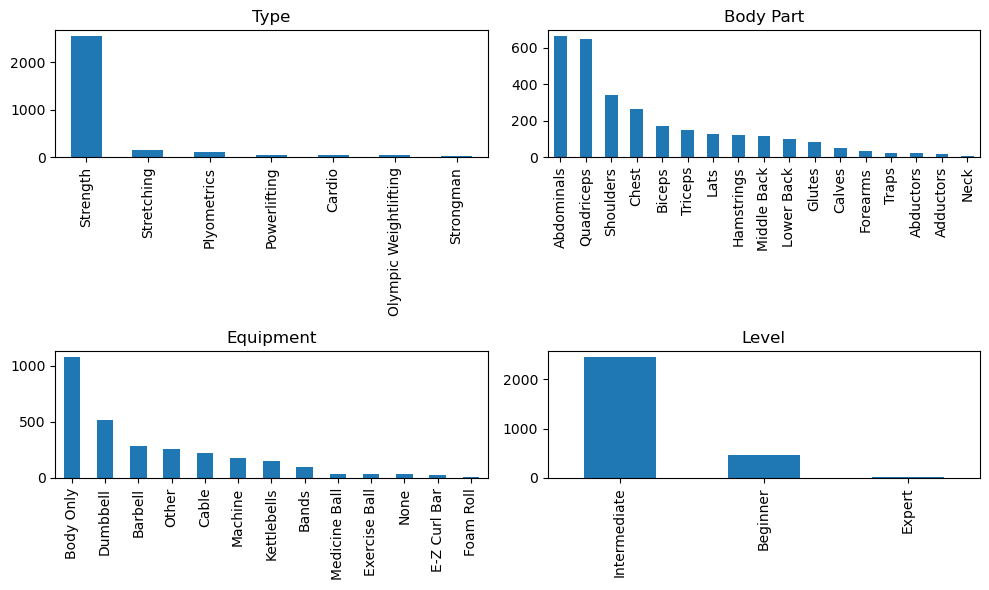

In [9]:
column1_counts = df['Type'].value_counts()
column2_counts = df['BodyPart'].value_counts()
column3_counts = df['Equipment'].value_counts()
column4_counts = df['Level'].value_counts()

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
column1_counts.plot(kind='bar')
plt.title('Type')

plt.subplot(2, 2, 2)
column2_counts.plot(kind='bar')
plt.title('Body Part')

plt.subplot(2, 2, 3)
column3_counts.plot(kind='bar')
plt.title('Equipment')

plt.subplot(2, 2, 4)
column4_counts.plot(kind='bar')
plt.title('Level')

plt.tight_layout()

From these graphs it can be seen that the body parts and necessary equipment have a normal appearance, while the type of load is mainly strength exercises, and the training level is mainly average, there are extremely few expert level exercises. Next, with the help of graphs, we will investigate which muscle groups can be pumped within the limits of individual types of load

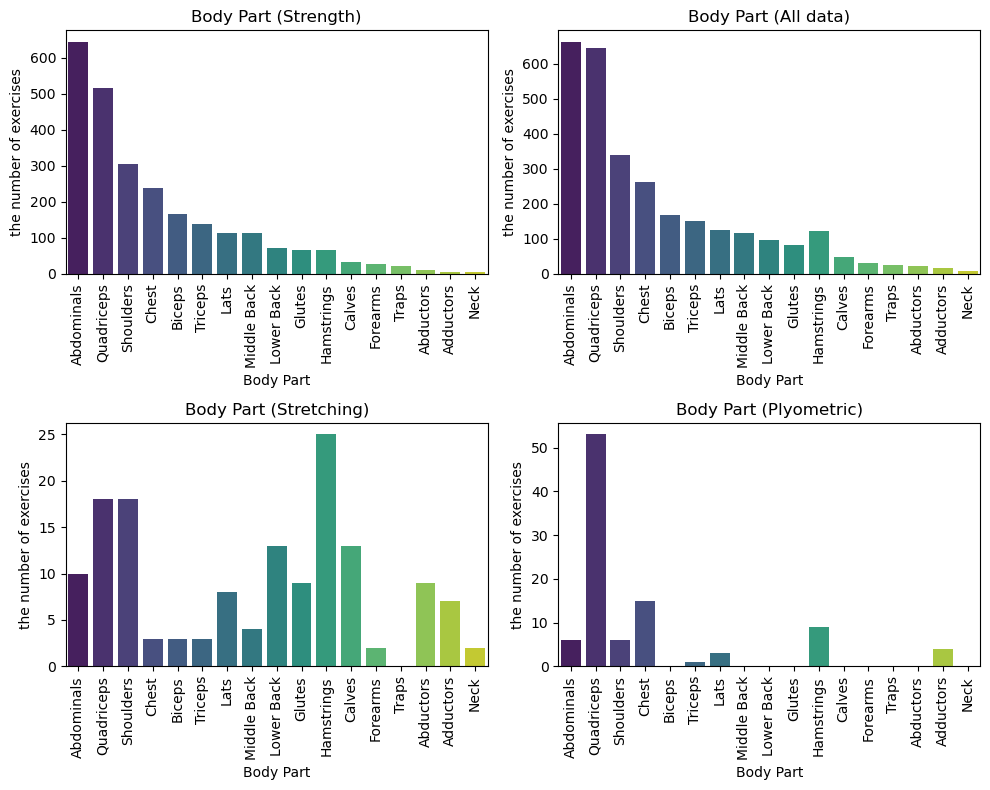

In [10]:
strength_exercises = df[df['Type'] == 'Strength']
stretch_exercises = df[df['Type'] == 'Stretching']
plyometric_exercises = df[df['Type'] == 'Plyometrics']

muscle_groups = strength_exercises['BodyPart'].value_counts()
colors = sns.color_palette('viridis', len(muscle_groups))
sorted_exercises_desc = strength_exercises['BodyPart'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.countplot(x='BodyPart', data=strength_exercises, palette=colors, order=sorted_exercises_desc.index, ax=axes[0, 0])
axes[0, 0].set_title('Body Part (Strength)')
axes[0, 0].set_xlabel('Body Part')
axes[0, 0].set_ylabel('the number of exercises')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='BodyPart', data=df, palette=colors, order=sorted_exercises_desc.index, ax=axes[0, 1])
axes[0, 1].set_title('Body Part (All data)')
axes[0, 1].set_xlabel('Body Part')
axes[0, 1].set_ylabel('the number of exercises')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x='BodyPart', data=stretch_exercises, palette=colors, order=sorted_exercises_desc.index, ax=axes[1, 0])
axes[1, 0].set_title('Body Part (Stretching)')
axes[1, 0].set_xlabel('Body Part')
axes[1, 0].set_ylabel('the number of exercises')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='BodyPart', data=plyometric_exercises, palette=colors, order=sorted_exercises_desc.index, ax=axes[1, 1])
axes[1, 1].set_title('Body Part (Plyometric)')
axes[1, 1].set_xlabel('Body Part')
axes[1, 1].set_ylabel('the number of exercises')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Conclusion: as it was found out earlier, the main type of load is power (this is related to the very specificity of the muscles). The graph with power load almost completely copies the graph with all types of load. The greatest number of stretching exercises are concentrated around those muscle groups that are easiest to stretch. Plyometric exercises are mainly focused around the muscle groups that jumps provide. Then we can determine if a person has a certain equipment or vice versa does not have it, what exercises can he perform?

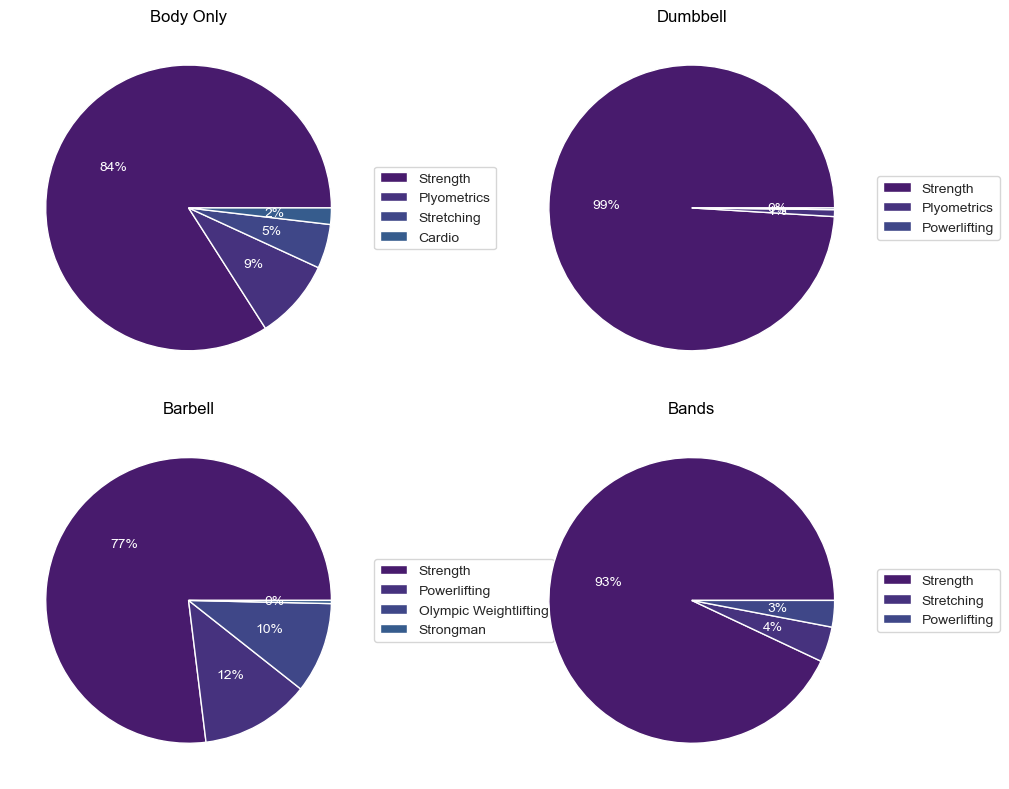

In [11]:
body_only = df[df['Equipment'] == 'Body Only']
dumbbell = df[df['Equipment'] == 'Dumbbell']
barbell = df[df['Equipment'] == 'Barbell']
bands = df[df['Equipment'] == 'Bands']

muscle_groups = strength_exercises['Equipment'].value_counts()
colors = sns.color_palette('viridis', len(muscle_groups))
sorted_exercises_desc = strength_exercises['BodyPart'].value_counts().sort_values(ascending=False)
sorted_exercises_asc = strength_exercises['BodyPart'].value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.set_style('whitegrid')

axes[0, 0].pie(body_only['Type'].value_counts(), autopct='%.0f%%', colors=colors, textprops = {'color': 'white'})
axes[0, 0].set_title('Body Only')

labels = body_only['Type'].unique()
axes[0, 0].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

axes[0, 1].pie(dumbbell['Type'].value_counts(), autopct='%.0f%%', colors=colors, textprops = {'color': 'white'})
axes[0, 1].set_title('Dumbbell')

labels = dumbbell['Type'].unique()
axes[0, 1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].pie(barbell['Type'].value_counts(), autopct='%.0f%%', colors=colors, textprops = {'color': 'white'})
axes[1, 0].set_title('Barbell')

labels = barbell['Type'].unique()
axes[1, 0].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 1].pie(bands['Type'].value_counts(), autopct='%.0f%%', colors=colors, textprops = {'color': 'white'})
axes[1, 1].set_title('Bands')

labels = bands['Type'].unique()
axes[1, 1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Conclusion: again repeating the situation, regardless of the equipment, you can always do strength exercises, while stretching cannot be done with dumbbells or a barbell. For a more complete picture, the results can be displayed as the following table:

In [12]:
df_new = pd.pivot_table(df, index='Type', columns='Equipment', aggfunc='size', fill_value=0)
df_new

Equipment,Bands,Barbell,Body Only,Cable,Dumbbell,E-Z Curl Bar,Exercise Ball,Foam Roll,Kettlebells,Machine,Medicine Ball,None,Other
Type,,,,,,,,,,,,,
Cardio,0,0,20,0,0,0,0,0,0,8,0,0,7
Olympic Weightlifting,0,35,0,0,0,0,0,0,0,0,0,0,0
Plyometrics,0,0,54,0,4,0,1,0,1,0,14,3,20
Powerlifting,4,29,0,0,1,0,0,0,0,1,0,0,2
Strength,93,217,906,226,511,22,33,2,148,166,24,7,190
Stretching,3,0,98,0,0,0,1,9,0,0,0,22,14
Strongman,0,1,0,0,0,0,0,0,0,0,0,0,21


Next, it was considered from the point of view of training levels, what types of load are available:

In [13]:
df.groupby(['Level']).count()

,Title,Type,BodyPart,Equipment,Rating
Level,,,,,
Beginner,459,459,459,459,459
Expert,13,13,13,13,7
Intermediate,2446,2446,2446,2446,565


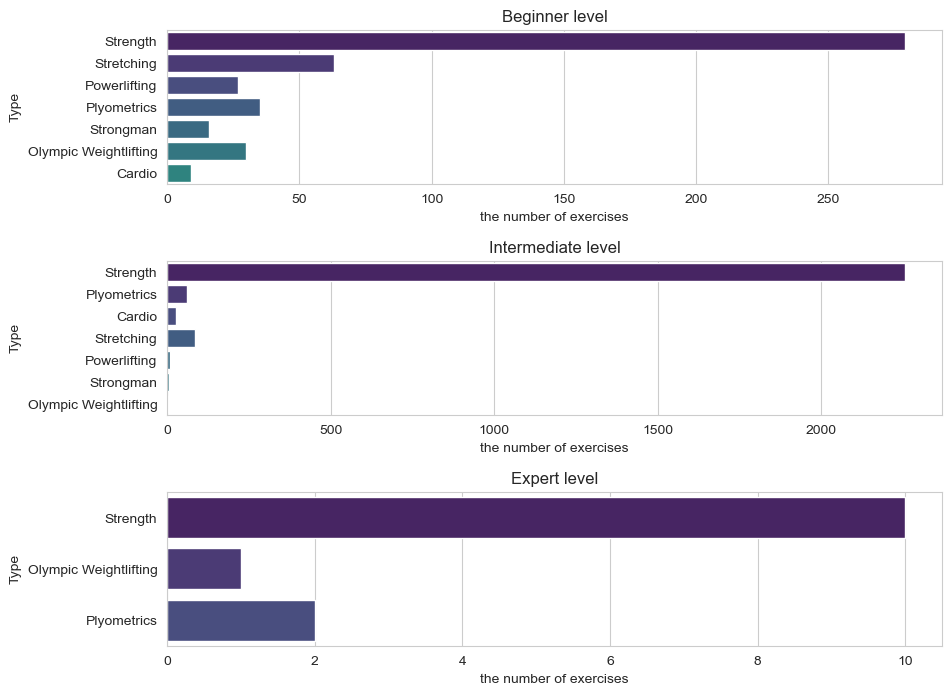

In [14]:
begginer_level = df[df['Level'] == 'Beginner'] 
intermediate_level = df[df['Level'] == 'Intermediate'] 
advanced_level = df[df['Level'] == 'Expert'] 

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
sorted_level = begginer_level['Level'].value_counts().sort_values(ascending=False)


sns.countplot(y='Type', data=begginer_level, palette=colors, ax=axes[0])
axes[0].set_title('Beginner level')
axes[0].set_xlabel('the number of exercises')
axes[0].set_ylabel('Type')
axes[0].tick_params(axis='x', rotation=0)

sns.countplot(y='Type', data=intermediate_level, palette=colors, ax=axes[1])
axes[1].set_title('Intermediate level')
axes[1].set_xlabel('the number of exercises')
axes[1].set_ylabel('Type')
axes[1].tick_params(axis='x', rotation=0)

sns.countplot(y='Type', data=advanced_level, palette=colors, ax=axes[2])
axes[2].set_title('Expert level')
axes[2].set_xlabel('the number of exercises')
axes[2].set_ylabel('Type')
axes[2].tick_params(axis='x', rotation=0)

plt.subplots_adjust(hspace=0.5)


Conclusion: As expected, there are a large number of strength exercises available for all fitness levels, but most exercises are available at the intermediate level, with quite a few expert-level exercises. The question is whether it is possible to pump a muscle group without additional equipment or vice versa with dumbbells/barbell/rubber bands, etc. often appears in the minds of athletes. The following table fully reflects the distribution of the number of exercises with certain equipment by body part

In [15]:
df_equip = pd.pivot_table(df, index='BodyPart', columns='Equipment', aggfunc='size', fill_value=0)
df_equip

Equipment,Bands,Barbell,Body Only,Cable,Dumbbell,E-Z Curl Bar,Exercise Ball,Foam Roll,Kettlebells,Machine,Medicine Ball,None,Other
BodyPart,,,,,,,,,,,,,
Abdominals,8,13,434,31,49,0,21,0,19,5,18,3,61
Abductors,2,0,17,0,0,0,0,1,0,1,0,0,0
Adductors,1,0,10,0,0,0,0,1,0,1,0,2,2
Biceps,4,26,6,30,79,10,0,1,0,6,0,0,6
Calves,3,4,8,0,4,0,0,1,0,18,0,3,6
Chest,14,25,88,25,50,2,3,0,6,25,7,0,17
Forearms,2,5,1,3,10,0,0,0,1,0,0,1,8
Glutes,5,5,54,4,4,0,2,1,3,1,1,0,1
Hamstrings,2,25,35,2,6,0,2,1,12,19,0,6,11


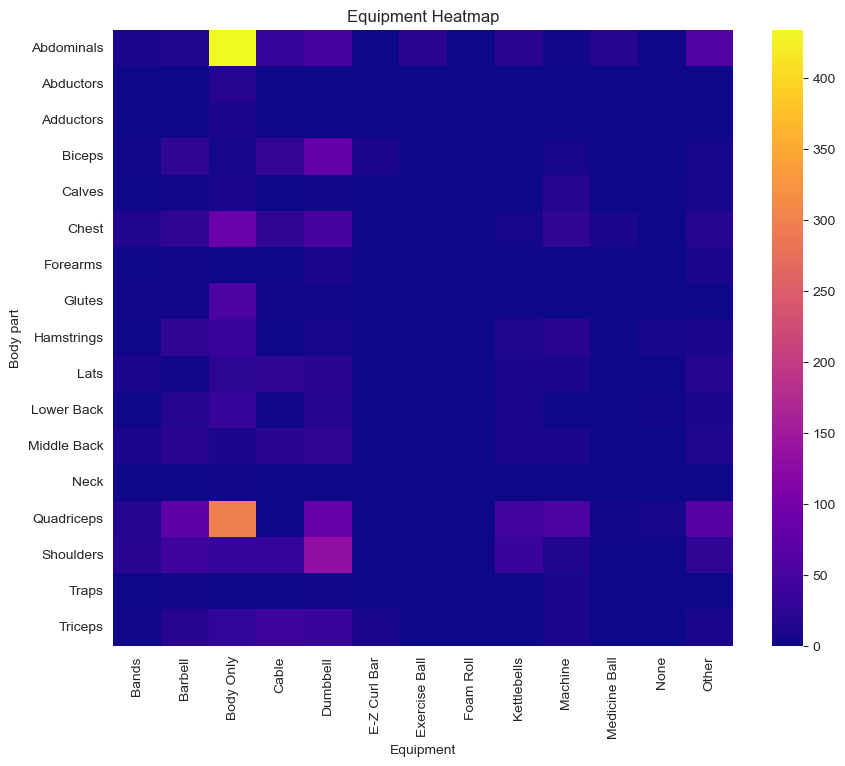

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_equip, cmap='plasma')

plt.title('Equipment Heatmap')
plt.xlabel('Equipment')
plt.ylabel('Body part')

plt.show()

Conclusion: we already know that the largest number of exercises exists for the abdominal muscles, but in this figure we can see that the greatest concentration of exercises is available for using only your body, and for the abdominal muscles, dumbbells are also often used and a popular muscle group is the quadriceps

If the question arises, what level of training is necessary for fully pumping a certain muscle group, you can answer it with the help of the following visualization:

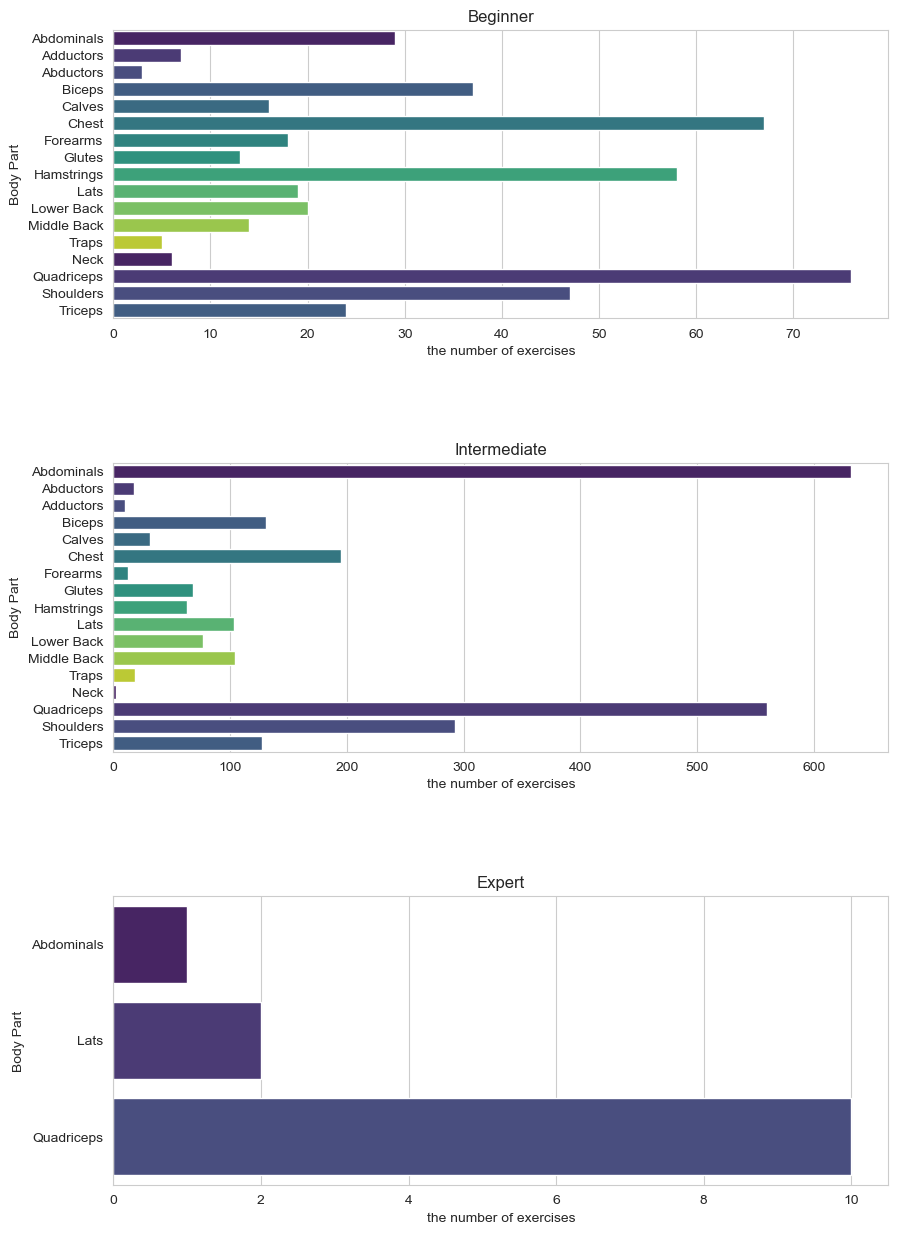

In [17]:
begginer_level = df[df['Level'] == 'Beginner'] 
intermediate_level = df[df['Level'] == 'Intermediate'] 
expert_level = df[df['Level'] == 'Expert'] 

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sorted_level = begginer_level['Level'].value_counts().sort_values(ascending=False)


sns.countplot(y='BodyPart', data=begginer_level, palette=colors, ax=axes[0])
axes[0].set_title('Beginner')
axes[0].set_xlabel('the number of exercises')
axes[0].set_ylabel('Body Part')
axes[0].tick_params(axis='x', rotation=0)

sns.countplot(y='BodyPart', data=intermediate_level, palette=colors, ax=axes[1])
axes[1].set_title('Intermediate')
axes[1].set_xlabel('the number of exercises')
axes[1].set_ylabel('Body Part')
axes[1].tick_params(axis='x', rotation=0)

sns.countplot(y='BodyPart', data=expert_level, palette=colors, ax=axes[2])
axes[2].set_title('Expert')
axes[2].set_xlabel('the number of exercises')
axes[2].set_ylabel('Body Part')
axes[2].tick_params(axis='x', rotation=0)

plt.subplots_adjust(hspace=0.5)

Conclusion: the situation with the initial and intermediate levels of experience is quite similar, for both levels, exercises for all muscle groups are fully available, however, for the intermediate level, the emphasis is strongly shifted towards the abdominal muscles, but in general, even at the initial level of experience, you can train any muscle group . Expert-level exercises mainly concern leg muscles. If we consider the question from the other side, what level of experience is necessary to use this or that equipment or, conversely, what equipment to use with a certain level of experience

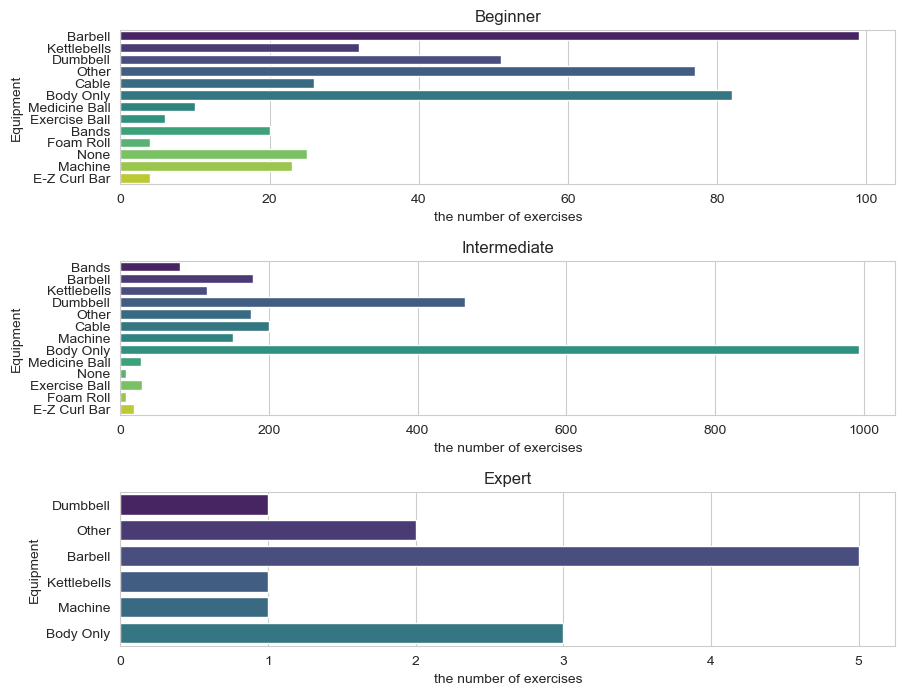

In [18]:
begginer_level = df[df['Level'] == 'Beginner'] 
intermediate_level = df[df['Level'] == 'Intermediate'] 
expert_level = df[df['Level'] == 'Expert'] 

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
sorted_level = begginer_level['Level'].value_counts().sort_values(ascending=False)


sns.countplot(y='Equipment', data=begginer_level, palette=colors, ax=axes[0])
axes[0].set_title('Beginner')
axes[0].set_xlabel('the number of exercises')
axes[0].set_ylabel('Equipment')
axes[0].tick_params(axis='x', rotation=0)

sns.countplot(y='Equipment', data=intermediate_level, palette=colors, ax=axes[1])
axes[1].set_title('Intermediate')
axes[1].set_xlabel('the number of exercises')
axes[1].set_ylabel('Equipment')
axes[1].tick_params(axis='x', rotation=0)

sns.countplot(y='Equipment', data=expert_level, palette=colors, ax=axes[2])
axes[2].set_title('Expert')
axes[2].set_xlabel('the number of exercises')
axes[2].set_ylabel('Equipment')
axes[2].tick_params(axis='x', rotation=0)

plt.subplots_adjust(hspace=0.5)

Conclusion: exercises for beginners mainly require a barbell, your own body, and other equipment. For the intermediate level, opportunities for working with own weight and dumbbells (which require a little more control than, for example, a barbell) open up to a large extent. However, expert-level exercises already require a larger barbell than beginner-level exercises. Therefore, consider two points:
1) What barbell curls are available for beginner and expert
2) From a beginner's point of view without equipment, how many exercises will be available for each muscle group.

In [19]:
df_equipment = df[df['Equipment'] == 'Barbell']
df_expert = df_equipment[(df_equipment['Level'] == 'Expert') | (df_equipment['Level'] == 'Beginner').head(20)]
df_expert

,Title,Type,BodyPart,Equipment,Level,Rating
11,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner,8.3
12,Barbell Side Bend,Strength,Abdominals,Barbell,Beginner,7.0
705,Wide-grip barbell curl,Strength,Biceps,Barbell,Beginner,9.3
708,Close-grip EZ-bar curl,Strength,Biceps,Barbell,Beginner,8.9
710,Barbell Curls Lying Against An Incline,Strength,Biceps,Barbell,Beginner,8.8
711,Seated Close-Grip Concentration Barbell Curl,Strength,Biceps,Barbell,Beginner,8.8
1802,Power snatch-,Olympic Weightlifting,Quadriceps,Barbell,Expert,9.3
1806,Narrow-stance squat,Strength,Quadriceps,Barbell,Expert,9.0
1812,Barbell forward lunge,Strength,Quadriceps,Barbell,Expert,8.8
1817,Barbell hack squat,Strength,Quadriceps,Barbell,Expert,8.5


After considering the obtained data, the difference between the beginner and expert level becomes clear. For example:
Beginner's exercise "Close-grip EZ-bar curl": with the help of biceps, it is necessary to slowly bend the arms at the elbows, raising the EZ-bar to the level of the shoulders. At the same time, it is important to avoid body movement or use impulse. The upper position is reached when the biceps are maximally curled and the muscles are compressed. Then we lower the EZ bar back to the starting position in a controlled manner.
Expert level exercise "Narrow-stance squat": considered an exercise for experts due to some peculiarities of the technique and movement requirements. It requires more strength, flexibility and stability, because the narrow leg spacing places a greater load on the quadriceps and requires more coordination of movement.
In addition, the Narrow-stance squat can be more demanding on muscle stabilization and gluteal strength, as the narrow leg spacing makes it difficult to maintain and move during the static and dynamic phases of the exercise.

<Axes: xlabel='count', ylabel='BodyPart'>

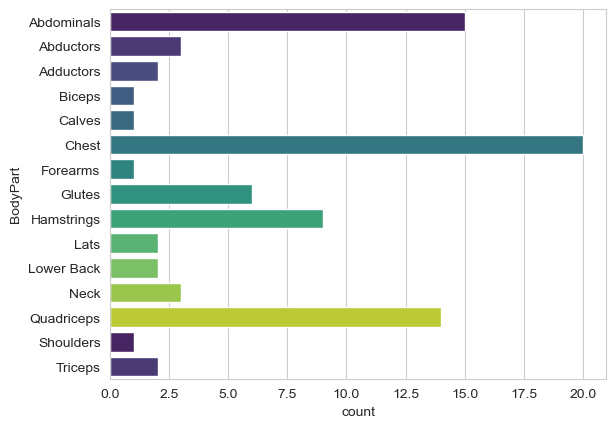

In [20]:
df_beginner = df[(df['Level'] == 'Beginner') & (df['Equipment'] == 'Body Only')]

sns.countplot(y='BodyPart', data=df_beginner, palette=colors)

Conclusion: as you can see, in general, for a beginner who can only exercise with his own body weight, exercises for all muscle groups are available. The worst situation here is in the biceps, calves and forearms. This is understandable, since the biceps can be pumped mainly only on the horizontal bar or bars, there are very few exercises for the calves anyway, and the situation with the forearms is similar to the biceps

In [21]:
clean_df = df.drop(df[df['Rating'] == 0.0].index)
clean_df['Rating'].value_counts()

8.8    52
8.3    49
9.0    43
8.7    42
8.5    40
       ..
2.4     2
3.5     1
2.5     1
1.6     1
6.1     1
Name: Rating, Length: 71, dtype: int64

Next, we will look at the only numerical data that is available, which is the rating of the exercises, as we saw at the beginning, only about a third of the exercises have a rating, but a much larger part has a value of 0.0, which is also not adequate.

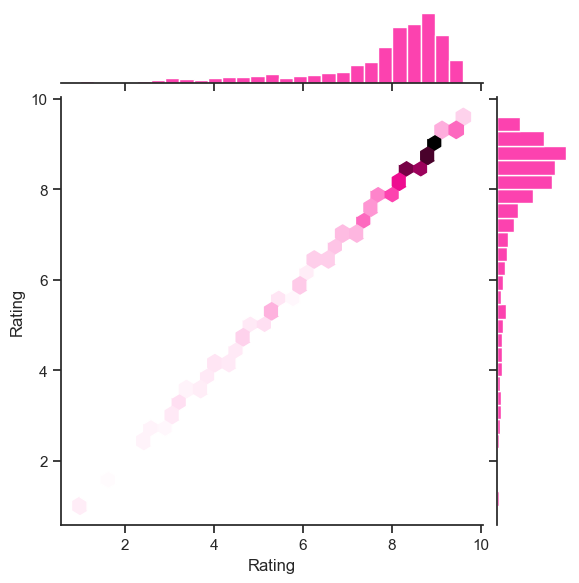

In [22]:
sns.set_theme(style="ticks")

sns.jointplot(x='Rating', y='Rating', data=clean_df, kind="hex", color="#fc0394")

In summary, the average assessment of the exercises is concentrated between 8 and 9 points, that is, most of the rights are evaluated quite well.